In [3]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Ross Anthony Miranda DAngelo CC: 1034988497
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

      t     i
0  1.00  3.10
1  1.01  3.12
2  1.02  3.14
3  1.03  3.18
4  1.04  3.24


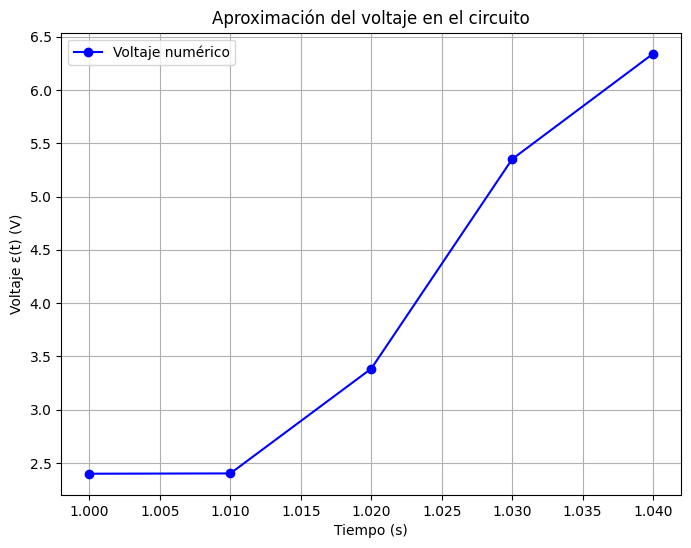

In [4]:

from scipy.interpolate import lagrange

# Datos medidos
t_values = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i_values = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

# Crear un DataFrame de Pandas
data = pd.DataFrame({'t': t_values, 'i': i_values})
print(data)

# Método de diferencias finitas de 3 puntos para calcular di/dt
di_dt = np.zeros_like(i_values)
dt = t_values[1] - t_values[0]  # Paso de tiempo

for j in range(1, len(i_values)-1):
    di_dt[j] = (i_values[j+1] - i_values[j-1]) / (2 * dt)

# Usar diferencias hacia adelante y hacia atrás en los extremos
di_dt[0] = (i_values[1] - i_values[0]) / dt
di_dt[-1] = (i_values[-1] - i_values[-2]) / dt

# Interpolación con un polinomio de Lagrange
poly = lagrange(t_values, i_values)

t_interp = np.linspace(min(t_values), max(t_values), 100)
i_interp = poly(t_interp)

di_dt_interp = np.gradient(i_interp, t_interp)

# Parámetros del circuito
L = 0.98  # Henrios
R = 0.142 # Ohmios

# Cálculo del voltaje epsilon(t)
epsilon = L * di_dt + R * i_values

# Graficar resultados
plt.figure(figsize=(8,6))
plt.plot(t_values, epsilon, 'bo-', label='Voltaje numérico')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje ε(t) (V)')
plt.title('Aproximación del voltaje en el circuito')
plt.legend()
plt.grid()
plt.show()


# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

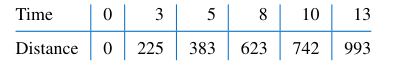



In [10]:

t = np.array([0, 3, 5, 8, 10, 13])
d = np.array([0, 225, 383, 623, 742, 993])

# Diferencias finitas centradas (excepto en los extremos)
velocidad = np.zeros(len(t))

for i in range(1, len(t) - 1):
    velocidad[i] = (d[i + 1] - d[i - 1]) / (t[i + 1] - t[i - 1])

# Usamos diferencias hacia adelante y hacia atrás en los extremos
velocidad[0] = (d[1] - d[0]) / (t[1] - t[0])
velocidad[-1] = (d[-1] - d[-2]) / (t[-1] - t[-2])

# Estimación de la velocidad en t = 12 usando el intervalo más cercano (10-13)
v_12 = (d[5] - d[4]) / (t[5] - t[4])

print("Velocidades instantáneas en cada punto:", velocidad)
print("Velocidad estimada en t=12:", v_12)


Velocidades instantáneas en cada punto: [75.         76.6        79.6        71.8        74.         83.66666667]
Velocidad estimada en t=12: 83.66666666666667


In [11]:
#HECHO CON INTERPOLACION EN QUE CONFIO MAS

import scipy.interpolate as interp

t = np.array([0, 3, 5, 8, 10, 13])
d = np.array([0, 225, 383, 623, 742, 993])


velocidad = np.gradient(d, t)

interp_f = interp.interp1d(t, velocidad, kind='cubic')
v_12 = interp_f(12)


print("Velocidades instantáneas en cada tiempo:", velocidad)
print("Velocidad aproximada en t=12:", v_12)


Velocidades instantáneas en cada tiempo: [75.         77.4        79.4        67.7        69.16666667 83.66666667]
Velocidad aproximada en t=12: 78.2966350411132


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

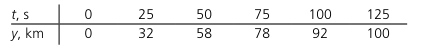

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [9]:

t = np.array([0, 25, 50, 75, 100, 125])  # tiempo en s
y = np.array([32, 58, 78, 92, 100, 100]) # distancia en km

velocidad = np.gradient(y, t)
aceleracion = np.gradient(velocidad, t)

print("Velocidades en cada instante:", velocidad)
print("Aceleraciones en cada instante:", aceleracion)


Velocidades en cada instante: [1.04 0.92 0.68 0.44 0.16 0.  ]
Aceleraciones en cada instante: [-0.0048 -0.0072 -0.0096 -0.0104 -0.0088 -0.0064]


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

Campo eléctrico simbólico Ez: z/(R**2 + z**2)**(3/2)
Campo eléctrico en z = 0.0001 m: 35355339.05932738 (en unidades de kq_tot)


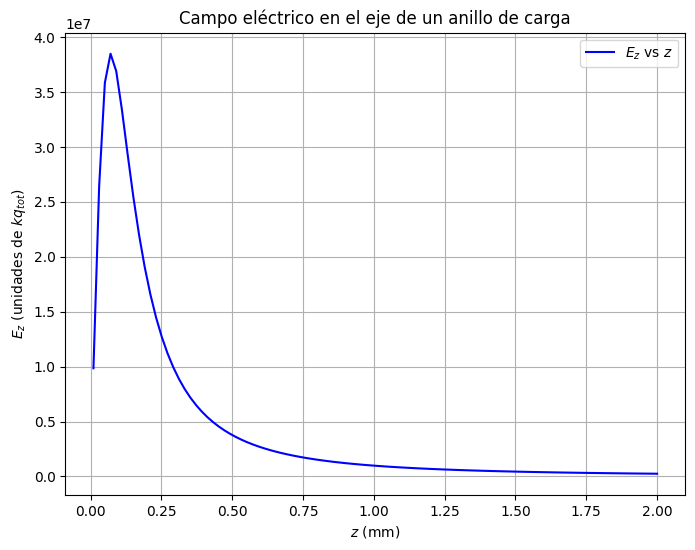

In [5]:


z, R = sp.symbols('z R')
V = 1 / sp.sqrt(z**2 + R**2)  # Reescalado en unidades de kq_tot

Ez_sym = -sp.diff(V, z)
Ez_sym_simplified = sp.simplify(Ez_sym)
print(f'Campo eléctrico simbólico Ez: {Ez_sym_simplified}')

# función numérica
Ez_func = sp.lambdify((z, R), Ez_sym_simplified, 'numpy')

# Parámetro dado R = 0.1 mm -> 0.1 * 10^-3 m
R_value = 0.1e-3

# b
z_value = 0.1e-3
Ez_at_z = Ez_func(z_value, R_value)
print(f'Campo eléctrico en z = {z_value} m: {Ez_at_z} (en unidades de kq_tot)')

# c
z_values = np.linspace(0.01e-3, 2e-3, 100)  # Valores de z desde 0.01 mm hasta 2 mm
Ez_values = Ez_func(z_values, R_value)

# Grafica
plt.figure(figsize=(8,6))
plt.plot(z_values * 1e3, Ez_values, label=r'$E_z$ vs $z$', color='b')
plt.xlabel(r'$z$ (mm)')
plt.ylabel(r'$E_z$ (unidades de $kq_{tot}$)')
plt.title('Campo eléctrico en el eje de un anillo de carga')
plt.legend()
plt.grid()
plt.show()
